<h1>Machine Learning for Regression </h1>


In [ ]:
import pandas as pd
import numpy as np
import wget

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

mydata = wget.download(data)

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

<H2> DATA CLEANING </H2>

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

# GET INDICES

In [ ]:
df.dtypes[df.dtypes== 'object']

# index --------- #values

In [ ]:
df.dtypes[df.dtypes== 'object'].index

In [ ]:
string = list(df.dtypes[df.dtypes == 'object'].index)

for col in string:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [ ]:
display(df)

<H2>  Zoomcamp 2.3 - Exploratory Data Analysis </H2> 

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #It returns unique values in the series 
    print(df[col].nunique()) # how many unique values are there?
    print()

<h3><b>Distribution of price </b></h3>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# TOVIEW histogram

sns.histplot(df.msrp,bins=50) #bins , how many bars?

# LONG TAIL DISTRIBUTION

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

the tail will confuse the model , (applying the logarithmic distribution ) taking the $log$ (and adding 1 to the value)

In [ ]:
np.log([0+1,1+1,10+1,100+1,10000+1]) # adding 1, to avoid log(0)
#EQUALS
np.log1p([0,1,10,100,10000]) # adding 1, to avoid log(0)

In [ ]:
price_logs = np.log1p(df.msrp)

display(price_logs)

In [ ]:
sns.histplot(price_logs,bins=50)


# TODO check log distribution

In [494]:
# some values will be missing

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<h3> ML Zoomcamp 2.4 - Setting Up The Validation Framework </h3>


In [495]:

n=len(df)
n_val = int(n*0.2) # 20% of the data set
n_test = int(n * 0.2) # 20% of the data set
n_train = n - n_val - n_test


In [496]:
n,n_val+n_test+n_train

(11914, 11914)

In [497]:
df.iloc[[0,1,2,3,4,5,6,7,8,9]] # takes an array and returns a subset of the dataset

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [500]:
# SUFFLE THE RECORS FOR TRAINING

df.iloc[[10,0,3,5]]

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

idx = np.arange(n)

np.random.seed(2) # mantain the shuffle 

np.random.shuffle(idx)


In [501]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
# SUFFLE THE RECORDS CORRECTLY

$ 0 - n $ 

$ 0 ..... n-1 $ 

$ 10 , 1000 , 10 , 0 $


In [502]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [503]:
len(df_train)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [504]:
#log distribution

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [505]:
del df_train['msrp'] #delete msrp (price)
del df_val['msrp'] #delete msrp (price)
del df_test['msrp'] #delete msrp (price) // target variable needs to be deleted

In [506]:
len(y_train)

7150

<i>Implemented validation Framework</i>

<h3> ML Zoomcamp 2.5 - Linear Regression </h3>

In [507]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [508]:
xi = [453,11,86]

Implementing linear regression function
$$ g(x_i) \approx y $$


In [509]:
w0= 7.17
#Weight for each feature 
w=[0.01,0.04,0.002]

$$ \begin{equation}  W_o + \sum_{j=0}^{n-1} (W_j X_{ij}) \end{equation}



$$ g(x_i) = W_o + x_{i1}

\\

 \begin{equation}  W_o + \sum_{j=0}^{n-1} (W_j X_{ij}) \end{equation}
 \\

$$

Vector form
$$

 \begin{equation}  W_o + \sum_{j=1}^{n} (W_j X_{ij}) \end{equation}
 \\
 
    \begin{equation}  W_o + x_i^{T} W \end{equation}
$$



In [510]:
def dot(xi,w):
    n = len (xi) 
    res = 0 
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [511]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [512]:
linear_regression(xi)

12.312000000000001

$$ W_o[ 7.17] + 453*0.01 + 11*0.04 + 86 * 0.002 = 12.3 \\  


In [513]:
np.expm1(linear_regression(xi))  # does -1

222347.22211010658

In [514]:
np.log1p(np.expm1(linear_regression(xi))) #UNDO

12.312000000000001

In [515]:
w_new = [w0] + w 

In [516]:
w_new # contains the bayes term , and the rest of features



[7.17, 0.01, 0.04, 0.002]


Solve for X

$$ 
\begin{equation} Xw = y \end{equation} \\
\begin{equation} W= x^{-1}y \end{equation}
$$




<h1> 2.7 Train a linear regression model </h1>

In [517]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

$$
W=(X^{T}X)^{-1}X^{T}y$$

In [518]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [519]:
X=np.column_stack([ones,X])

In [520]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [521]:
XTX = X.T.dot(X)
XTX_inverse = np.linalg.inv(XTX)

XTX.dot(XTX_inverse).round(1) # the numbers can be very small


array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [522]:
w_full = XTX_inverse.dot(X.T).dot(y)

In [523]:
w0=w_full[0]
w=w_full[1:]
w0,w # for extra year , the price y decreases

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [524]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])

    X=np.column_stack([ones,X])

    XTX = X.T.dot(X)

    XTX_inverse = np.linalg.inv(XTX)

    w_full = XTX_inverse.dot(X.T).dot(y)

    return w_full[0],w_full[1:] # first term is bayes , second is weights

In [525]:
train_linear_regression(X,y)

LinAlgError: Singular matrix

<h1> Car price baseline model </h1>

In [526]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train= df_train[base].values # extract the values


X_train = df_train[base].fillna(0).values

display(X_train)

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [527]:
w0,w = train_linear_regression(X_train,y_train)

In [528]:
y_pred = w0+ X_train.dot(w)

In [529]:
X_train= df_train[base].values

display(df_train[base].isnull().sum())

display(df_train[base].fillna(0).isnull().sum()) # makes the model ignore null values


engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

<AxesSubplot:ylabel='Count'>

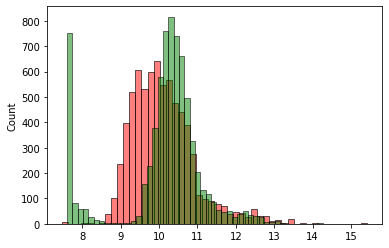

In [530]:
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_train,color='green',alpha=0.5,bins=50)

<h1> Root mean squared error </h1>

$$ \sqrt{\frac{1}{m} \sum_{i=1}^{m} (g(x_i) -y_i)^2} $$

In [532]:
def rmse(y,y_pred):
    se = pow(y - y_pred, 2)
    mse = se.mean() # NUMPY mean method
    return np.sqrt(mse)

In [534]:
rmse(y_train,y_pred)

0.7554192603920132

<h1> ML Zoomcamp 2.10 - Computing RMSE on Validation Data
 </h1>

In [535]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values

w0,w = train_linear_regression(X_train,y_train)


y_pred = w0+ X_train.dot(w)



In [536]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [537]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train) # TRAINING PART 
X_val = prepare_X(df_val) # VALIDATION PART
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.761653099130158

In [538]:
# TODO IMPROVING THE MODEL

<H1>ML Zoomcamp 2.11 - Feature Engineering</H1>

In [539]:

# FEATURE OF THE MODEL
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [540]:
def prepare_X(df):
    df = df.copy() # working with a copy instead
    df['age' ] = 2017 - df.year
    features = base + ['age'] # base = baseline numeric features
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [541]:
X_train = prepare_X(df_train)

In [542]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [543]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train) # TRAINING PART 
X_val = prepare_X(df_val) # VALIDATION PART
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred) # THE MODEL IMPROVED THE RMSE

0.5172055461058312

<AxesSubplot:ylabel='Count'>

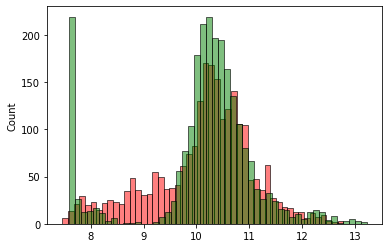

In [544]:
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_val,color='green',alpha=0.5,bins=50)

<h1>ML Zoomcamp 2.12 - Categorical Variables
</h1>

In [545]:
df_train.dtypes # type object

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [546]:
for v in [2,3,4]:
    del df_train['num_doors_%s ' %v] 

KeyError: 'num_doors_2 '

In [547]:
for v in [2,3,4]:
     df_train['num_doors_%s ' %v] = (df_train.number_of_doors == v).astype('int') # turn a boolean into a integer



In [548]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [549]:
def prepare_X(df):
    df = df.copy() # working with a copy instead
    features = base.copy()

    df['age' ] = 2017 - df.year
    features.append('age') # base = baseline numeric features

    makes= list(df.make.value_counts().head().index)

    for v in [2,3,4]:
        df['num_doors_%d ' %v] = (df_train.number_of_doors == v).astype('int') # turn a boolean into a integer
        features.append('num_doors_%d ' %v)

    for c,values in categories.items():
        for v in values:
            df['%s_%s ' %(c,v)] = (df[c] == v).astype('int') # turn a boolean into a integer
            features.append('%s_%s ' %(c,v))

        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



In [550]:
prepare_X(df_train) # ADD A NEW SET OF COULUMNS

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   1.,   0.,   0.],
       [148.,   4.,  37., ...,   1.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   1.,   0.]])

In [551]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred) # improvement of 1% !!!!!!!!

150.93465032189482

In [552]:
w

array([-1.34511115e+00,  1.16011474e+02,  1.57782286e+00,  2.22454790e+01,
       -1.98389089e-03, -1.28344865e+00,  2.68116524e+02,  2.49547250e+02,
        2.68027177e+02, -6.69600696e+00,  3.31842905e-02,  2.65779054e+01,
       -6.33716476e+01,  1.47949504e+01, -5.66433213e+02, -5.05740683e+02,
       -5.00631717e+02, -5.54301708e+02, -7.31303360e+02,  4.12400656e+16,
        4.12400656e+16,  4.12400656e+16,  4.12400656e+16,  4.12400656e+16,
        1.37613629e+16,  1.37613629e+16,  1.37613629e+16,  1.37613629e+16,
        4.19481968e+01,  1.60666846e+01, -1.20490893e+00,  2.07407168e+00,
       -3.37580250e+01,  1.84690723e+00,  2.62969292e+01,  7.01787982e+00])

In [ ]:
categorical_variables = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category',
'vehicle_size','vehicle_size']

# create a dictionary

categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [553]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large']}

<h1> ML 2.13 Regularization </h1>

In [554]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [556]:
y= [1, 2, 3, 1, 2, 3]


In [557]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [558]:

XTX_inv = np.linalg.inv(XTX)

In [559]:
XTX_inv

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615122e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [560]:
XTX_inv.dot(X.T).dot(y)

array([ 3.25115862e-01, -4.41093100e+06,  4.41093113e+06])

In [561]:

XTX = [ # add a small alpha to the diagonal (Cantor's diagonalization)
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]



XTX= np.array(XTX)

In [562]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [563]:
# ADD NUMBER TO THE DIAGONAL

XTX = XTX + np.eye(3) * 0.01

In [564]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [565]:
def train_linear_regression_regularized(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # XTX.shape[0] == size


    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [566]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression_regularized(X_train, y_train,r=0.01) # TRAINING PART 
X_val = prepare_X(df_val) # VALIDATION PART

y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

# TODO find best value for r 

0.46346576424476904

<h1> ML Zoomcamp 2.14 - Tuning the Model
</h1>

In [582]:
for r in [0.0,0.0000001, 0.0001,0.001,0.1,1,10]:
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression_regularized(X_train, y_train,r=r) # TRAINING PART 
    X_val = prepare_X(df_val) # VALIDATION PART
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    print(r,w0,score)

0.0 -5.500142844269565e+16 150.93465032189482
1e-07 7837.191105418437 0.4634736235796989
0.0001 6.403431176312071 0.46347358285681817
0.001 6.346521306421328 0.46347284570666103
0.1 6.253611998399772 0.4634196306982818
1 5.6994666407350465 0.4640402845233949
10 4.34431209001507 0.4779202673133335


In [583]:
r= 1
X_train = prepare_X(df_train)
w0,w = train_linear_regression_regularized(X_train, y_train,r=r) # TRAINING PART 
X_val = prepare_X(df_val) # VALIDATION PART
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
print(r,w0,score)

1 5.6994666407350465 0.4640402845233949


<h1> ML Zoomcamp 2.15 - Using The Model
</h1>

In [584]:
df_train,df_val # COMBINE DATA SETS

df_full_train = pd.concat([df_train,df_val])

df_full_train = df_full_train.reset_index(drop=True)

df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [585]:
X_full_train = prepare_X(df_full_train)

In [586]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   1.,   0.,   0.],
       [148.,   4.,  37., ...,   1.,   0.,   0.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   1.],
       [148.,   4.,  34., ...,   1.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   1.,   0.]])

In [587]:
y_full_train = np.concatenate([y_train,y_val])

In [573]:
w0,w = train_linear_regression_regularized(X_full_train,y_full_train,r=1)

In [588]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score


0.45851379060262765

In [592]:
car= df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [593]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [594]:
prepare_X(df_small)

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]])

In [595]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.412473332122167

In [596]:
np.expm1(y_pred)

33271.061576528045

In [598]:
np.expm1(y_test[20])




35000.00000000001